<a href="https://colab.research.google.com/github/SVithurabiman/Applied-Machine-Learning---Universtiy-of-Micgingan-on-Coursera/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


INDEX NUMBER : 180588G

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 


%matplotlib inline

In [29]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


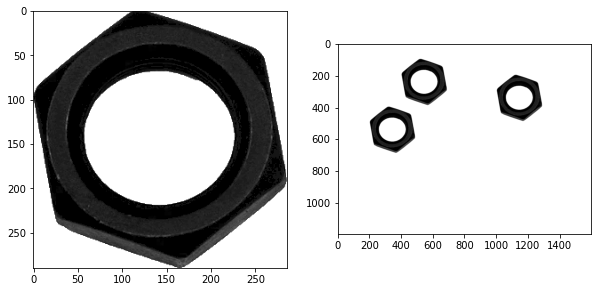

In [30]:
template_im = cv.imread(r'/content/gdrive/MyDrive/A05/template.png', cv.IMREAD_GRAYSCALE)
belt_im =  cv.imread(r'/content/gdrive/MyDrive/A05/belt.png', cv.IMREAD_GRAYSCALE)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(template_im, cmap='gray')
ax[1].imshow(belt_im, cmap='gray')
plt.show()

In [31]:
th_t, img_t = cv.threshold(template_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [32]:
print(th_t)
print(th_b)

138.0
138.0


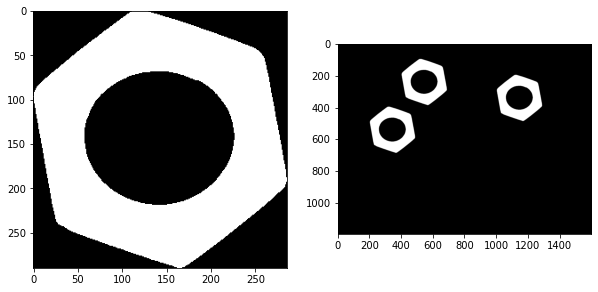

In [33]:
fig, ax = plt. subplots(1,2,figsize=(10,10))
#print(th_t)
#print(img_t)
ax[0].imshow(img_t, cmap='gray')
ax[1].imshow(img_b, cmap='gray')
plt.show()

In [34]:
kernel =np.ones((3,3)).astype(np.uint8) #"< 3x3 matubyterix with all ones, with uint8 dtype>" 
closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)

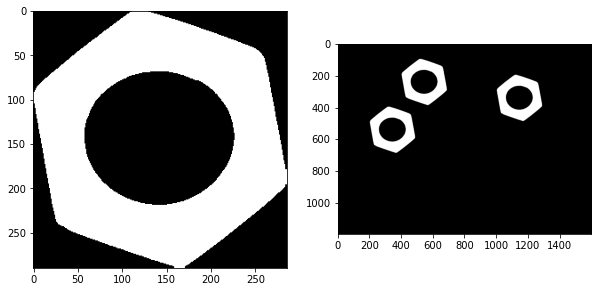

In [35]:
fig, ax = plt. subplots(1,2,figsize=(10,10))
#print(th_t)
#print(img_t)
ax[0].imshow(closing_t, cmap='gray')
ax[1].imshow(closing_b, cmap='gray')
plt.show()

In [36]:
retval_t, labels_t, stats_t, centroids_t = cv.connectedComponentsWithStats(closing_t)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)

In [37]:
print(retval_t,retval_b) #no of objects including background
print(labels_t)
print( stats_b) # left_x left_y width height area of the bouding box
print( centroids_b) #centroids

2 4
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[      0       0    1600    1200 1798161]
 [    400     100     286     290   40613]
 [   1000     200     286     290   40613]
 [    200     400     286     290   40613]]
[[ 807.85728475  614.56805258]
 [ 542.82567158  243.78479797]
 [1142.82567158  343.78479797]
 [ 342.82567158  543.78479797]]


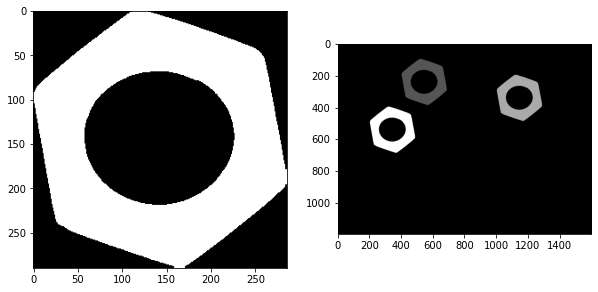

In [38]:
fig, ax = plt. subplots(1,2,figsize=(10,10))
#print(th_t)
#print(img_t)
ax[0].imshow(labels_t, cmap='gray')
ax[1].imshow(labels_b, cmap='gray')
plt.show()

• *How many connected compoonets are detected in each image?*
The first image has 2 components;  the nut and the background
The second image has 4 components; the 3 nuts and the background
Both these values can be obtained from the retval varaible of the respective image

• *What are the statistics? Interpret these statistics.*
 Statistics is a matrix of the stats that the function calculates. It has a length equal to the number of labels(inclduing the background) and a width equal to the number of stats. Statistics are accessed via stats [label,COLUMN]. The interpretationS of the COLUMN are as follows;

*cv2.CC_STAT_LEFT* The leftmost x coordinate of the bounding box in the horizontal direction.

*cv2.CC_STAT_TOP* The topmost y coordinate which of the bounding box in the vertical direction.

*cv2.CC_STAT_WIDTH* The horizontal length of the bounding box

*cv2.CC_STAT_HEIGHT* The vertical length of the bounding box

*cv2.CC_STAT_AREA* The total area (in pixels) of the connected component


• *What are the centroids?*

The centroids are the center of mass of a body. Here it can be intepreted as the (x,y) coordinates of the centroid of the contour


In [39]:
contours_t, hierarchy_t = cv.findContours(closing_t, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_b, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) #findind contour points
# retr_tre- creates hiehcarchy of all counours
#cv aprrox simple?
#print(contours_t[0].shape)

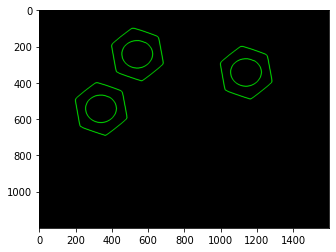

In [40]:
# Visualizing contours
im_contours_belt = np.zeros((belt_im.shape[0],belt_im.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)

In [41]:
label = 1 # remember that the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8')   #omitting background and getting all objects
belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) #getting contours of all objeects   #ret_external - extreme countorus are counted
for j,c in enumerate(belt_cont):
        print(j)
        print(cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)) #mathcing the contour with template #match shape output between 0 and 1 -- 0 most matching --1 lease matching

0
0.00010071698397151607
1
0.00010071698397928763
2
0.00010071698397484674


cv.matchShapes matches the refrence countour countours_t[0] to each contour c and gives a value between 0 and 1. 0 indicating that the countpour is a perfect fit to the refernced contour and 1 indicating that the contour does not  match the refernced contour at all.

In [42]:
ca = cv.contourArea(contours_b[1])
#print(ca)

In [43]:

M = cv.moments(contours_b[1])
cx, cy = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))


In [44]:
count=1
object_prev_frame = np.array([cx, cy, ca, count])
print(object_prev_frame)


[3.410e+02 5.420e+02 2.008e+04 1.000e+00]


In [45]:
delta_x = 15

In [46]:
def get_indexed_image(im):
    #template_im = cv.imread(r'template.png', cv.IMREAD_GRAYSCALE)
    th_t, img_t = cv.threshold(im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    kernel =np.ones((3,3)).astype(np.uint8)   #"< 3x3 matubyterix with all ones, with uint8 dtype>" 
    closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)  
    retval, labels, stats, centroids= cv.connectedComponentsWithStats(closing_t)
   
    return retval, labels, stats, centroids 

In [47]:
def is_new(a, b, delta, i):
  out=np.absolute(b[i]-a)
  res=out[:,i]>delta[i]
  #print(out[:,i])
  val=res.all()


  return val

In [48]:
# check prev_index  expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
              [7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
              [1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])

b = np.array( [7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])
print( is_new(a,b,delta,i))

False


In [49]:
def prev_index(a, b, delta, i):
  index = -1
  out=np.absolute(b[i]-a)
  res=out[:,i]<delta[i]
  #print(res)
  index  = np.where(res==True)
  #print(index[0][0])
  return a[index[0][0]][-1]   


In [50]:
# check prev_index  expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
              [7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
              [1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])

b = np.array( [7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])

assert prev_index(a,b,delta,i) == 1, " Check the function" 

In [53]:

cap = cv.VideoCapture('/content/gdrive/MyDrive/A05/conveyor_with_rotation.mp4') # give the correct path here
frame_number=0
prev_frame_details=[]
total_nuts=1
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fourcc = cv.VideoWriter_fourcc(*'MP4V')
out = cv.VideoWriter('180588G_en2550_a05.mp4',fourcc, 10, (frame_width,frame_height))
while cap.isOpened(): 
   
    ret, frame = cap.read()
    frame=cv.rotate(frame, cv.ROTATE_90_COUNTERCLOCKWISE)
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    delta_x = np.array([15])
    i = np.array([0]) 
    count=0
    frame_details=[]


    grey = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    retval, labels, stats, centroids =get_indexed_image(grey)
    label = 1 # remember that the label of the background is 0
    belt = ((labels >= label)*255).astype('uint8')   #omitting background and getting all objects
    belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) #getting contours of all objeects   #ret_external - extreme countorus are counted
    
    
    conts = cv.drawContours(im_contours_belt, belt_cont, -1, (0,255,0), 3).astype('uint8')
    im_contours_belt = np.zeros((frame.shape[0],frame.shape[1],3), np.uint8)
    conts = cv.drawContours(im_contours_belt, belt_cont, -1, (0,255,0), 3).astype('uint8')

    for j,c in enumerate(belt_cont):
      matching_coef=cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)
      if matching_coef<0.5:
        count+=1
        M = cv.moments(c)
        cy, cx = (int(M["m10"] / M["m00"]), (frame.shape[0]-int(M["m01"] / M["m00"])))
        ca = cv.contourArea(c)
        object_current_frame = np.array([cx, cy, ca, count])
        frame_details.append(object_current_frame)
    
    if frame_number==0:
      prev_frame_details=frame_details
      frame_number+=1
      continue
    y=0

    for object_detail in frame_details:
      if is_new(prev_frame_details,object_detail,delta_x,i):
        total_nuts+=1
        object_detail[-1]=total_nuts
      else:
        prev_index_=prev_index(prev_frame_details, object_detail, delta_x, i)   
        object_detail[-1]=prev_index_
      y+=1
      conts=cv.rotate(conts, cv.ROTATE_90_CLOCKWISE)
      
      conts = cv.putText(conts, str(int(object_detail[-1])),(int(object_detail[0]),int(object_detail[1])),cv.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 4)
     
      conts= cv.putText(conts, "Object {}: {:04} {:04} {:05}".format(int(object_detail[-1]), int(object_detail[0]), int(object_detail[1]), object_detail[2]),(50,700+ 70*y), cv.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 4)
      conts=cv.rotate(conts, cv.ROTATE_90_COUNTERCLOCKWISE)
    
    
    conts=cv.rotate(conts, cv.ROTATE_90_CLOCKWISE)
   
    prev_frame_details=frame_details
    conts = cv.putText(conts, "180588G" , (50,100) , cv.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3)
    cont=cv.putText(conts,("Frame_number:"+str(frame_number)),(50,700), cv.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3)
    out.write(conts)
    #cv2_imshow(conts)
    frame_number+=1
    if cv.waitKey(1) == ord('q') : #or frame_number==10 :  
        break
#print(total_nuts)
cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


In [25]:
!cp /content/gdrive/MyDrive/Colab_Notebooks/Assignment5.ipynb /content/


In [26]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [27]:
!jupyter nbconvert --to PDF "Assignment5.ipynb"

^C
